In [1]:
%pylab nbagg

import math
import os

from collections import namedtuple

from h5py import File
from matplotlib import pyplot
from scipy.integrate import quad
from scipy.optimize import curve_fit, brentq

from soleil import DatasetPathContains, get_dataset

Populating the interactive namespace from numpy and matplotlib


In [2]:
ROOT = "/home/experiences/instrumentation/picca/jupyter/mars/20171282/"
PUBLISHED = os.path.join(ROOT, "published-data")

In [3]:
# read all the spectra
Spectrum = namedtuple('Spectrum', "x y")

numbers = [43, 48, 51, 55, 58, 64, 67, 70, 73, 76,
           80, 93, 96, 99, 102, 105, 108, 111, 114, 117,
           120, 125, 128]

es = [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
      0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
      0.9, 0.9, 0.9]

#numbers = [93, 102]

files = [os.path.join(ROOT, "Scan_{}_01.nxs".format(d)) for d in numbers]

def getSpectrum(filename: str):
    path_x = DatasetPathContains("scan_data/actuator_1_1")
    path_y = DatasetPathContains("scan_data/data_01")
    
    with File(filename, mode='r') as h5file:
        return Spectrum(get_dataset(h5file, path_x)[:],
                        get_dataset(h5file, path_y)[:])

spectra = [getSpectrum(f) for f in files]

<IPython.core.display.Javascript object>


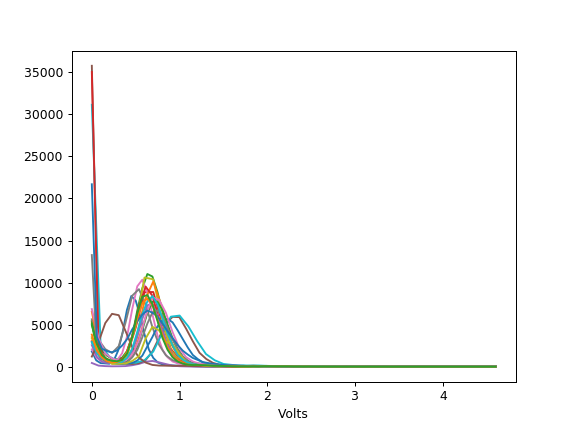

In [4]:
# plot all the MAO spectra

pyplot.figure()

for s in spectra:
    pyplot.plot(s.x, s.y)

pyplot.xlabel("Volts")
pyplot.show()

<IPython.core.display.Javascript object>


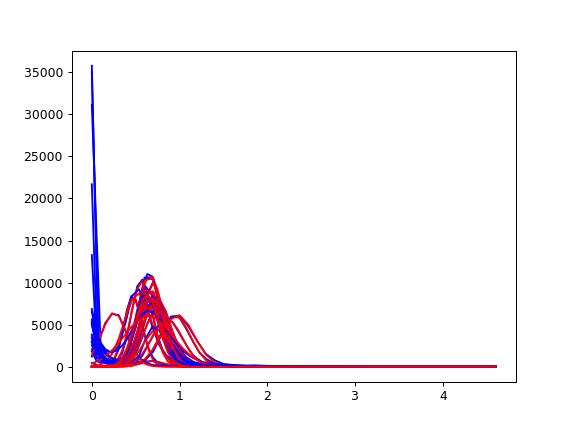

[(array([  8.32632869e+03,   4.71558389e-01,   1.03754862e-01]), 863.8970874938597), (array([  7.30712534e+03,   7.08162474e-01,   1.41417881e-01]), 1033.3581809021562), (array([  1.08642920e+04,   6.62958721e-01,   1.46858631e-01]), 1595.5150624726696), (array([  9.39859531e+03,   6.58027122e-01,   1.36478938e-01]), 1282.7103099465019), (array([  6.57816791e+02,   6.81173926e-01,   1.32122470e-01]), 86.91237924706171), (array([  6.03714767e+03,   9.49383866e-01,   1.72845077e-01]), 1043.4912527828988), (array([  1.01938814e+04,   5.72077462e-01,   1.23758501e-01]), 1261.5794854256412), (array([  8.73338997e+03,   5.26096540e-01,   1.57979991e-01]), 1379.7008675280254), (array([  1.12874816e+04,   6.54974919e-01,   1.24512934e-01]), 1405.437450438776), (array([  6.15065438e+03,   9.77115211e-01,   1.89058514e-01]), 1162.833577953518), (array([  5.65430549e+03,   8.57579234e-01,   1.74345828e-01]), 985.8045738595973), (array([  1.00201441e+04,   6.95491628e-01,  -1.31119747e-01]), 1313.

In [5]:
def func(x, a, x0,sigma):
    return a*np.exp(-np.power((x - x0)/sigma, 2.)/2.)


def func2(x, a, x0, sigma, e):
    return quad(func, x0-x, x0+x, args=(a, x0, sigma))[0] - e*math.fabs(a * sigma)

pyplot.figure()

popts = []
for i, (xdata, ydata) in enumerate(spectra):
    popt, pcov = curve_fit(func, xdata[1:], ydata[1:])
    popts.append(popt)

    pyplot.plot(xdata, ydata, "b")
    pyplot.plot(xdata, func(xdata, *popt), "r")

pyplot.show()

print([(popt, math.fabs(popt[0] * popt[2])) for popt in popts])

In [6]:
for e, popt in zip(es, popts):
    res = brentq(func2, 0, 1, args=tuple(popt)+(e,))
    print(popt, res, popt[1] - res, popt[1] + res)

[  8.32632869e+03   4.71558389e-01   1.03754862e-01] 0.048387971607057385 0.423170417423 0.519946360637
[  7.30712534e+03   7.08162474e-01   1.41417881e-01] 0.06595280690257531 0.642209666901 0.774115280706
[  1.08642920e+04   6.62958721e-01   1.46858631e-01] 0.06849020011675835 0.594468520937 0.73144892117
[  9.39859531e+03   6.58027122e-01   1.36478938e-01] 0.06364944099084974 0.59437768063 0.721676562611
[  6.57816791e+02   6.81173926e-01   1.32122470e-01] 0.06161772252274721 0.619556203656 0.742791648702
[  6.03714767e+03   9.49383866e-01   1.72845077e-01] 0.08060945260569363 0.868774413438 1.02999331865
[  1.01938814e+04   5.72077462e-01   1.23758501e-01] 0.0577170333150583 0.514360428999 0.629794495629
[  8.73338997e+03   5.26096540e-01   1.57979991e-01] 0.07367684879433382 0.452419690708 0.599773388297
[  1.12874816e+04   6.54974919e-01   1.24512934e-01] 0.05806887686695497 0.596906042021 0.713043795755
[  6.15065438e+03   9.77115211e-01   1.89058514e-01] 0.08817088475808063 0.8